# How are in-demand skills trending for Data Analysts over a year?

## Methodology

  ### 1. Aggregate skill counts monthly 
  ### 2. Re Analyze based on total percetage of jobs
  ### 3.  plot the monthly skill demand

In [1]:
#Importing required libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\maheb\anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
df_US_DA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US_DA['job_posted_month_num'] = df_US_DA['job_posted_date'].dt.month
df_US_DA_exploded  = df_US_DA.explode('job_skills')


In [15]:
df_US_DA_pivot = df_US_DA_exploded.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)
df_US_DA_pivot.loc['Total'] = df_US_DA_pivot.sum()


In [22]:
df_US_DA_pivot = df_US_DA_pivot[df_US_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [ ]:
df_US_DA_pivot = df_US_DA_pivot.drop('Total')

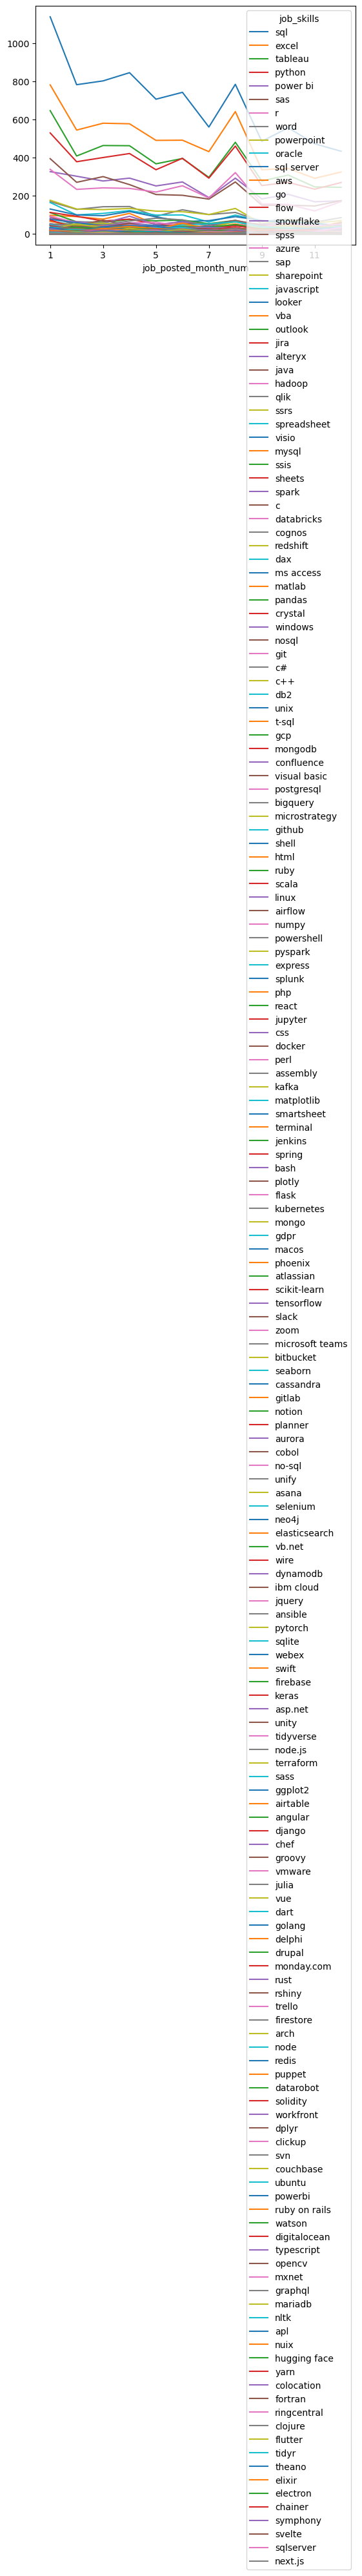

In [27]:
df_US_DA_pivot.plot(kind='line')
plt.show()

In [29]:
df_US_DA_total = df_US_DA.groupby('job_posted_month_num').size()

In [36]:
df_US_DA_percentage = df_US_DA_pivot.div(df_US_DA_total/100, axis=0)

In [37]:
df_US_DA_percentage = df_US_DA_percentage.reset_index()

In [ ]:
df_US_DA_percentage['job_posted_month'] = df_US_DA_percentage['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_US_DA_percentage = df_US_DA_percentage.set_index('job_posted_month')
df_US_DA_percentage = df_US_DA_percentage.drop(columns='job_posted_month_num')

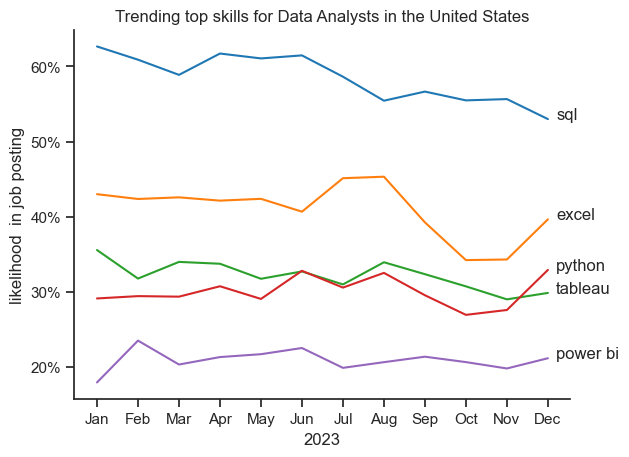

In [56]:
df_plot = df_US_DA_percentage.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
plt.title('Trending top skills for Data Analysts in the United States')
plt.ylabel('likelihood  in job posting')
plt.xlabel('2023')
plt.legend().remove()
sns.despine()
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
plt.show()